In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
plt.style.use('ggplot')

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn imported successfully")

✓ All libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4
Scikit-learn imported successfully


In [2]:
print("Downloading NLTK stopwords...")
nltk.download('stopwords')
nltk.download('punkt')
print("✓ NLTK data downloaded successfully!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


✓ NLTK data downloaded successfully!


In [ ]:
print("="*60)
print("STEP 1: LOADING DATASET")
print("="*60)


df = pd.read_csv('spam.csv', encoding='latin-1')

print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:")
df.head()

STEP 1: LOADING DATASET

Original Dataset Shape: (5572, 5)

Column Names:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

First 5 rows:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [ ]:
print("\n" + "="*60)
print("STEP 2: DATA CLEANING")
print("="*60)


df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(f"\nCleaned Dataset Shape: {df.shape}")
print(f"\nNew Column Names: {df.columns.tolist()}")


print(f"\nData Types:")
print(df.dtypes)


print(f"\nMissing Values:")
print(df.isnull().sum())


print(f"\nDuplicate Rows: {df.duplicated().sum()}")


df = df.drop_duplicates(keep='first')
print(f"\nShape After Removing Duplicates: {df.shape}")


print(f"\nSample Messages:")
df.head(10)


STEP 2: DATA CLEANING

Cleaned Dataset Shape: (5572, 2)

New Column Names: ['label', 'message']

Data Types:
label      object
message    object
dtype: object

Missing Values:
label      0
message    0
dtype: int64

Duplicate Rows: 403

Shape After Removing Duplicates: (5169, 2)

Sample Messages:


,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030



STEP 3: EXPLORATORY DATA ANALYSIS

Class Distribution (Count):
label
ham     4516
spam     653
Name: count, dtype: int64

Class Distribution (Percentage):
label
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64


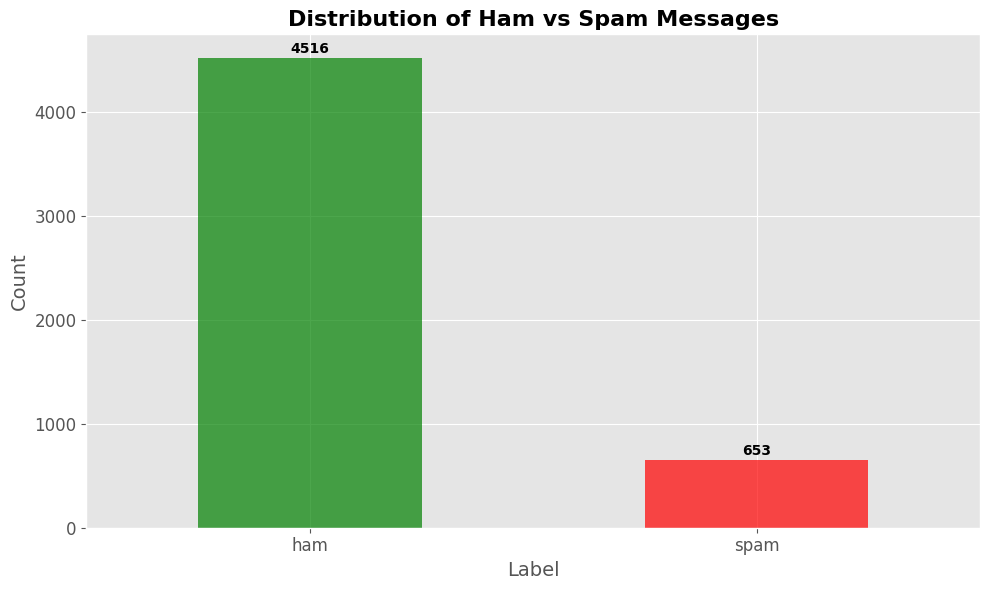


✓ Visualization saved as 'class_distribution.png'


In [ ]:
print("\n" + "="*60)
print("STEP 3: EXPLORATORY DATA ANALYSIS")
print("="*60)


print(f"\nClass Distribution (Count):")
print(df['label'].value_counts())

print(f"\nClass Distribution (Percentage):")
print(df['label'].value_counts(normalize=True) * 100)


plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Distribution of Ham vs Spam Messages', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(df['label'].value_counts()):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualization saved as 'class_distribution.png'")


MESSAGE LENGTH ANALYSIS

Message Length Statistics by Label:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
spam    653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

Word Count Statistics by Label:
        count       mean        std  min   25%   50%   75%    max
label                                                            
ham    4516.0  14.134632  11.116240  1.0   7.0  11.0  18.0  171.0
spam    653.0  23.681470   5.967672  2.0  22.0  25.0  28.0   35.0


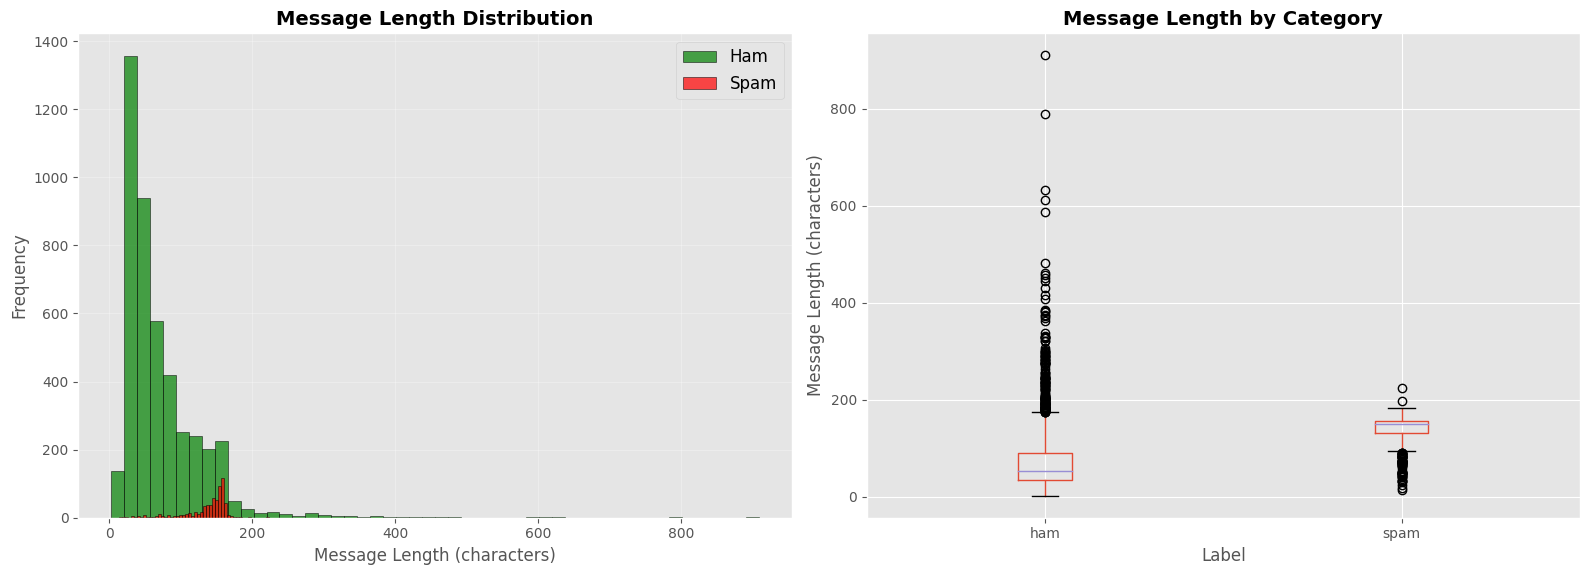


✓ Visualization saved as 'message_length_analysis.png'


In [ ]:
print("\n" + "="*60)
print("MESSAGE LENGTH ANALYSIS")
print("="*60)


df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))


print(f"\nMessage Length Statistics by Label:")
print(df.groupby('label')['message_length'].describe())

print(f"\nWord Count Statistics by Label:")
print(df.groupby('label')['word_count'].describe())


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


axes[0].hist(df[df['label'] == 'ham']['message_length'], bins=50, alpha=0.7, 
             label='Ham', color='green', edgecolor='black')
axes[0].hist(df[df['label'] == 'spam']['message_length'], bins=50, alpha=0.7, 
             label='Spam', color='red', edgecolor='black')
axes[0].set_xlabel('Message Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Message Length Distribution', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=12)
axes[0].grid(alpha=0.3)


df.boxplot(column='message_length', by='label', ax=axes[1])
axes[1].set_xlabel('Label', fontsize=12)
axes[1].set_ylabel('Message Length (characters)', fontsize=12)
axes[1].set_title('Message Length by Category', fontsize=14, fontweight='bold')
plt.suptitle('')

plt.tight_layout()
plt.savefig('message_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualization saved as 'message_length_analysis.png'")

In [ ]:
print("\n" + "="*60)
print("STEP 4: TEXT PREPROCESSING")
print("="*60)


ps = PorterStemmer()

def preprocess_text(text):
    """
    Preprocess text data:
    1. Convert to lowercase
    2. Remove special characters and numbers
    3. Tokenize
    4. Remove stopwords
    5. Apply stemming
    """
    
    text = text.lower()
    
    
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    
    words = text.split()
    
    # Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    
    # Join words back into string
    return ' '.join(words)

# Test preprocessing on sample messages
print("\nTesting Preprocessing Function:")
print("-" * 60)
sample_messages = [
    "WINNER!! You have won a 1 week FREE membership!",
    "Hey, how are you doing today?",
    "Call now to claim your prize!"
]

for msg in sample_messages:
    processed = preprocess_text(msg)
    print(f"\nOriginal: {msg}")
    print(f"Processed: {processed}")


STEP 4: TEXT PREPROCESSING

Testing Preprocessing Function:
------------------------------------------------------------

Original: WINNER!! You have won a 1 week FREE membership!
Processed: winner week free membership

Original: Hey, how are you doing today?
Processed: hey today

Original: Call now to claim your prize!
Processed: call claim prize


In [9]:
print("\n" + "="*60)
print("APPLYING PREPROCESSING TO ENTIRE DATASET")
print("="*60)

# Apply preprocessing
df['processed_message'] = df['message'].apply(preprocess_text)

# Show comparison
print("\nComparison of Original vs Processed Messages:")
print("-" * 60)
comparison_df = df[['message', 'processed_message']].head(10)
for idx, row in comparison_df.iterrows():
    print(f"\n{idx+1}. Original: {row['message'][:70]}...")
    print(f"   Processed: {row['processed_message'][:70]}...")

# Check for empty processed messages
empty_count = df['processed_message'].apply(lambda x: len(x) == 0).sum()
print(f"\nEmpty processed messages: {empty_count}")

# Display statistics
print(f"\nProcessed message length statistics:")
df['processed_length'] = df['processed_message'].apply(len)
print(df.groupby('label')['processed_length'].describe())


APPLYING PREPROCESSING TO ENTIRE DATASET

Comparison of Original vs Processed Messages:
------------------------------------------------------------

1. Original: Go until jurong point, crazy.. Available only in bugis n great world l...
   Processed: go jurong point crazi avail bugi n great world la e buffet cine got am...

2. Original: Ok lar... Joking wif u oni......
   Processed: ok lar joke wif u oni...

3. Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Te...
   Processed: free entri wkli comp win fa cup final tkt st may text fa receiv entri ...

4. Original: U dun say so early hor... U c already then say......
   Processed: u dun say earli hor u c alreadi say...

5. Original: Nah I don't think he goes to usf, he lives around here though...
   Processed: nah think goe usf live around though...

6. Original: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd...
   Processed: freemsg hey darl week word back like fun still tb ok xxx 

In [10]:
print("\n" + "="*60)
print("STEP 5: LABEL ENCODING")
print("="*60)

# Encode labels: ham=0, spam=1
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

print("\nLabel Encoding Mapping:")
print("ham  → 0")
print("spam → 1")

print(f"\nEncoded Label Distribution:")
print(df['label_encoded'].value_counts().sort_index())

# Verify encoding
print(f"\nVerification - First 10 labels:")
print(df[['label', 'label_encoded']].head(10))


STEP 5: LABEL ENCODING

Label Encoding Mapping:
ham  → 0
spam → 1

Encoded Label Distribution:
label_encoded
0    4516
1     653
Name: count, dtype: int64

Verification - First 10 labels:
  label  label_encoded
0   ham              0
1   ham              0
2  spam              1
3   ham              0
4   ham              0
5  spam              1
6   ham              0
7   ham              0
8  spam              1
9  spam              1


In [11]:
print("\n" + "="*60)
print("STEP 6: TRAIN-TEST SPLIT")
print("="*60)

# Prepare features and target
X = df['processed_message']
y = df['label_encoded']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDataset Split:")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nClass Distribution in Training Set:")
print(y_train.value_counts().sort_index())
print(f"\nClass Distribution in Test Set:")
print(y_test.value_counts().sort_index())


STEP 6: TRAIN-TEST SPLIT

Dataset Split:
Total samples: 5169
Training samples: 4135 (80.0%)
Test samples: 1034 (20.0%)

Class Distribution in Training Set:
label_encoded
0    3613
1     522
Name: count, dtype: int64

Class Distribution in Test Set:
label_encoded
0    903
1    131
Name: count, dtype: int64


In [12]:
print("\n" + "="*60)
print("STEP 7: FEATURE EXTRACTION (TF-IDF)")
print("="*60)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf.transform(X_test)

print(f"\nTF-IDF Vectorization Complete!")
print(f"Training feature shape: {X_train_tfidf.shape}")
print(f"Test feature shape: {X_test_tfidf.shape}")
print(f"Number of features: {X_train_tfidf.shape[1]}")
print(f"Feature matrix type: {type(X_train_tfidf)}")
print(f"Sparsity: {(1.0 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))*100:.2f}%")

# Show top features
feature_names = tfidf.get_feature_names_out()
print(f"\nSample Features (first 20):")
print(feature_names[:20])


STEP 7: FEATURE EXTRACTION (TF-IDF)

TF-IDF Vectorization Complete!
Training feature shape: (4135, 3000)
Test feature shape: (1034, 3000)
Number of features: 3000
Feature matrix type: <class 'scipy.sparse._csr.csr_matrix'>
Sparsity: 99.76%

Sample Features (first 20):
['aah' 'aathi' 'abi' 'abil' 'abiola' 'abl' 'abt' 'aburo' 'abus' 'ac'
 'academ' 'acc' 'accept' 'access' 'accid' 'accident' 'accomod'
 'accordingli' 'account' 'ach']


In [13]:
print("\n" + "="*60)
print("MODEL 1: NAIVE BAYES CLASSIFIER")
print("="*60)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test_tfidf)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

print(f"\nNaive Bayes Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"Precision: {nb_precision:.4f} ({nb_precision*100:.2f}%)")
print(f"Recall:    {nb_recall:.4f} ({nb_recall*100:.2f}%)")
print(f"F1-Score:  {nb_f1:.4f} ({nb_f1*100:.2f}%)")

print(f"\nClassification Report:")
print(classification_report(y_test, nb_pred, target_names=['Ham', 'Spam']))

print(f"\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, nb_pred)
print(cm_nb)



MODEL 1: NAIVE BAYES CLASSIFIER

Naive Bayes Performance:
Accuracy:  0.9720 (97.20%)
Precision: 0.9811 (98.11%)
Recall:    0.7939 (79.39%)
F1-Score:  0.8776 (87.76%)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       903
        Spam       0.98      0.79      0.88       131

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Confusion Matrix:
[[901   2]
 [ 27 104]]


In [14]:
print("\n" + "="*60)
print("MODEL 2: LOGISTIC REGRESSION")
print("="*60)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_tfidf)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print(f"\nLogistic Regression Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f} ({lr_precision*100:.2f}%)")
print(f"Recall:    {lr_recall:.4f} ({lr_recall*100:.2f}%)")
print(f"F1-Score:  {lr_f1:.4f} ({lr_f1*100:.2f}%)")

print(f"\nClassification Report:")
print(classification_report(y_test, lr_pred, target_names=['Ham', 'Spam']))

print(f"\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, lr_pred)
print(cm_lr)



MODEL 2: LOGISTIC REGRESSION

Logistic Regression Performance:
Accuracy:  0.9652 (96.52%)
Precision: 1.0000 (100.00%)
Recall:    0.7252 (72.52%)
F1-Score:  0.8407 (84.07%)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       903
        Spam       1.00      0.73      0.84       131

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.96      1034


Confusion Matrix:
[[903   0]
 [ 36  95]]


In [15]:
print("\n" + "="*60)
print("MODEL 3: SUPPORT VECTOR MACHINE (SVM)")
print("="*60)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
print("Training SVM (this may take a moment)...")
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print(f"\nSVM Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"Precision: {svm_precision:.4f} ({svm_precision*100:.2f}%)")
print(f"Recall:    {svm_recall:.4f} ({svm_recall*100:.2f}%)")
print(f"F1-Score:  {svm_f1:.4f} ({svm_f1*100:.2f}%)")

print(f"\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=['Ham', 'Spam']))

print(f"\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, svm_pred)
print(cm_svm)


MODEL 3: SUPPORT VECTOR MACHINE (SVM)
Training SVM (this may take a moment)...

SVM Performance:
Accuracy:  0.9865 (98.65%)
Precision: 0.9835 (98.35%)
Recall:    0.9084 (90.84%)
F1-Score:  0.9444 (94.44%)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       903
        Spam       0.98      0.91      0.94       131

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034


Confusion Matrix:
[[901   2]
 [ 12 119]]


In [16]:
print("\n" + "="*60)
print("MODEL 4: RANDOM FOREST CLASSIFIER")
print("="*60)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Training Random Forest...")
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_tfidf)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"\nRandom Forest Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Precision: {rf_precision:.4f} ({rf_precision*100:.2f}%)")
print(f"Recall:    {rf_recall:.4f} ({rf_recall*100:.2f}%)")
print(f"F1-Score:  {rf_f1:.4f} ({rf_f1*100:.2f}%)")

print(f"\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=['Ham', 'Spam']))

print(f"\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_pred)
print(cm_rf)


MODEL 4: RANDOM FOREST CLASSIFIER
Training Random Forest...

Random Forest Performance:
Accuracy:  0.9797 (97.97%)
Precision: 0.9911 (99.11%)
Recall:    0.8473 (84.73%)
F1-Score:  0.9136 (91.36%)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       903
        Spam       0.99      0.85      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix:
[[902   1]
 [ 20 111]]


In [17]:
print("\n" + "="*60)
print("MODEL 5: DECISION TREE CLASSIFIER")
print("="*60)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test_tfidf)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(f"\nDecision Tree Performance:")
print(f"{'='*40}")
print(f"Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f} ({dt_precision*100:.2f}%)")
print(f"Recall:    {dt_recall:.4f} ({dt_recall*100:.2f}%)")
print(f"F1-Score:  {dt_f1:.4f} ({dt_f1*100:.2f}%)")

print(f"\nClassification Report:")
print(classification_report(y_test, dt_pred, target_names=['Ham', 'Spam']))

print(f"\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, dt_pred)
print(cm_dt)


MODEL 5: DECISION TREE CLASSIFIER

Decision Tree Performance:
Accuracy:  0.9565 (95.65%)
Precision: 0.8116 (81.16%)
Recall:    0.8550 (85.50%)
F1-Score:  0.8327 (83.27%)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.97      0.97       903
        Spam       0.81      0.85      0.83       131

    accuracy                           0.96      1034
   macro avg       0.90      0.91      0.90      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix:
[[877  26]
 [ 19 112]]


In [1]:
print("\n" + "="*60)
print("STEP 8: COMPARATIVE ANALYSIS")
print("="*60)

# Create results dictionary
results = {
    'Naive Bayes': {
        'accuracy': nb_accuracy,
        'precision': nb_precision,
        'recall': nb_recall,
        'f1_score': nb_f1
    },
    'Logistic Regression': {
        'accuracy': lr_accuracy,
        'precision': lr_precision,
        'recall': lr_recall,
        'f1_score': lr_f1
    },
    'SVM': {
        'accuracy': svm_accuracy,
        'precision': svm_precision,
        'recall': svm_recall,
        'f1_score': svm_f1
    },
    'Random Forest': {
        'accuracy': rf_accuracy,
        'precision': rf_precision,
        'recall': rf_recall,
        'f1_score': rf_f1
    },
    'Decision Tree': {
        'accuracy': dt_accuracy,
        'precision': dt_precision,
        'recall': dt_recall,
        'f1_score': dt_f1
    }
}

# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\nModel Performance Comparison:")
print("="*60)
print(results_df)

# Find best model for each metric
print("\n" + "="*60)
print("BEST MODELS BY METRIC:")
print("="*60)
for metric in results_df.columns:
    best_model = results_df[metric].idxmax()
    best_score = results_df[metric].max()
    print(f"{metric.upper():15s}: {best_model:25s} ({best_score:.4f})")


===== Multinomial Naive Bayes Evaluation =====
Accuracy: 0.9769
Precision: 0.9907
Recall: 0.9649
F1 Score: 0.9777

Confusion Matrix:
 [[7859   79]
 [ 307 8445]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7938
           1       0.99      0.96      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690


===== Logistic Regression Evaluation =====
Accuracy: 0.9861
Precision: 0.9803
Recall: 0.9935
F1 Score: 0.9868

Confusion Matrix:
 [[7763  175]
 [  57 8695]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.


GENERATING COMPARISON VISUALIZATIONS


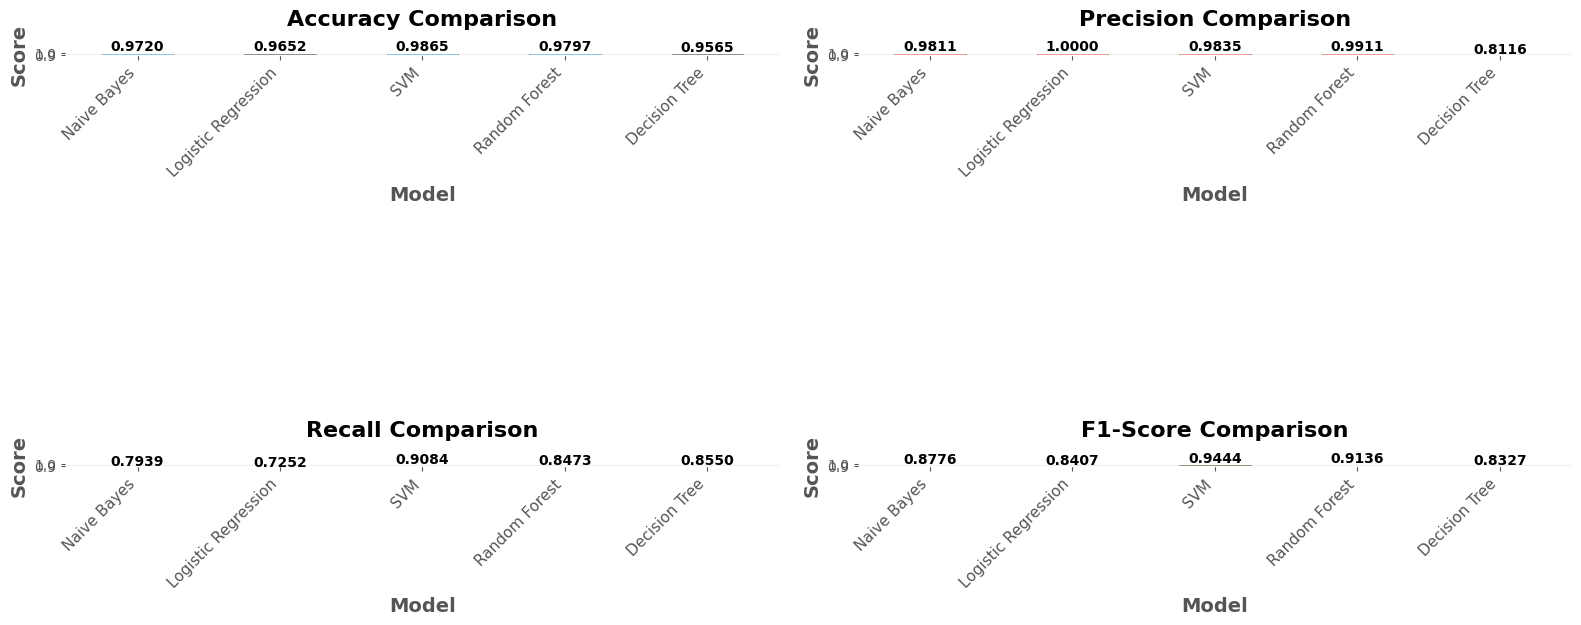


✓ Visualization saved as 'model_comparison.png'


In [19]:
print("\n" + "="*60)
print("GENERATING COMPARISON VISUALIZATIONS")
print("="*60)

# Create 2x2 subplot for metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
titles = ['Accuracy Comparison', 'Precision Comparison', 
          'Recall Comparison', 'F1-Score Comparison']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Create bar plot
    bars = results_df[metric].plot(kind='bar', ax=ax, color=color, alpha=0.8, edgecolor='black')
    
    # Customize
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Score', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model', fontsize=14, fontweight='bold')
    ax.set_ylim([0.90, 1.0])
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_xticklabels(results_df.index, rotation=45, ha='right', fontsize=11)
    
    # Add value labels on bars
    for i, v in enumerate(results_df[metric]):
        ax.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'model_comparison.png'")


GENERATING CONFUSION MATRICES


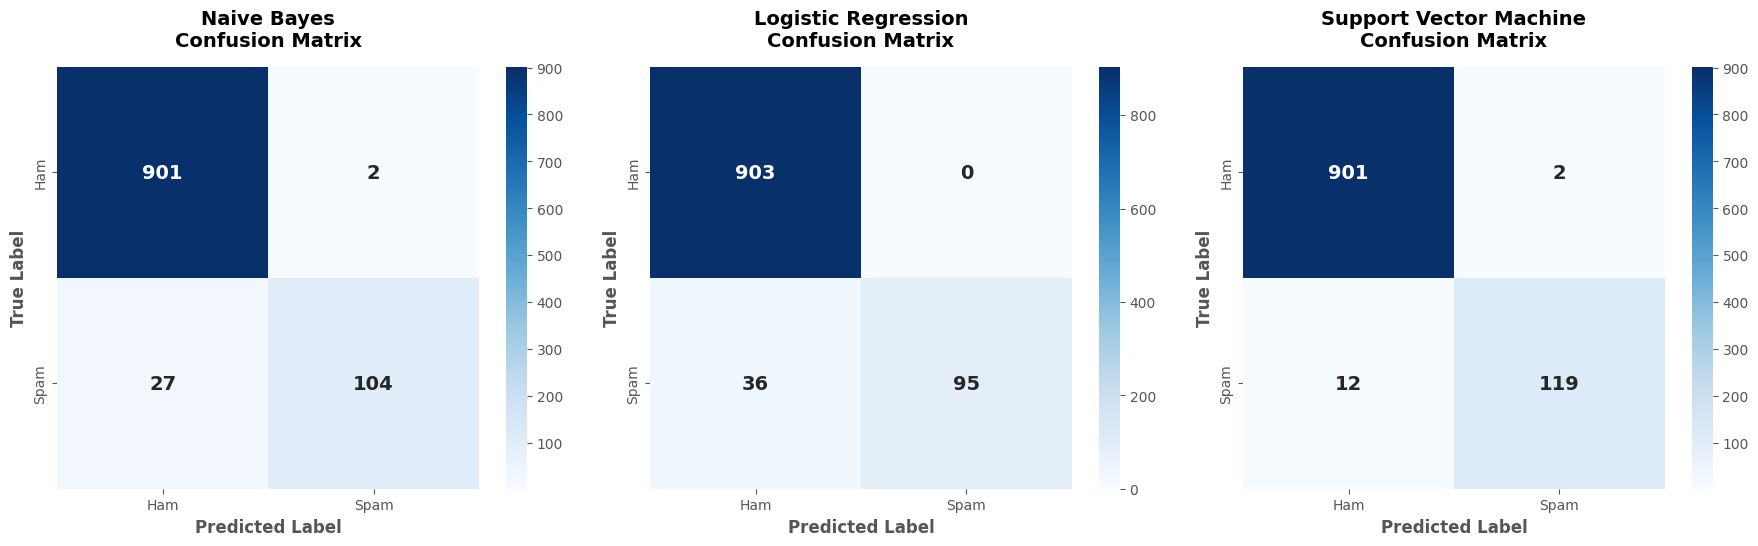


✓ Visualization saved as 'confusion_matrices.png'


In [20]:
print("\n" + "="*60)
print("GENERATING CONFUSION MATRICES")
print("="*60)

# Create confusion matrices for top 3 models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = [
    (nb_pred, 'Naive Bayes', cm_nb),
    (lr_pred, 'Logistic Regression', cm_lr),
    (svm_pred, 'Support Vector Machine', cm_svm)
]

for idx, (pred, name, cm) in enumerate(models_to_plot):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'],
                cbar=True, square=True, annot_kws={'size': 14, 'weight': 'bold'})
    
    axes[idx].set_title(f'{name}\nConfusion Matrix', 
                        fontsize=14, fontweight='bold', pad=15)
    axes[idx].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'confusion_matrices.png'")

In [21]:
print("\n" + "="*60)
print("STEP 9: SAVING MODELS")
print("="*60)

# Save the best model (Naive Bayes) and TF-IDF vectorizer
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
    
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("\n✓ Models saved successfully!")
print("  Files created:")
print("  1. naive_bayes_model.pkl")
print("  2. tfidf_vectorizer.pkl")
print("\n  These files are required for the Streamlit application.")


STEP 9: SAVING MODELS

✓ Models saved successfully!
  Files created:
  1. naive_bayes_model.pkl
  2. tfidf_vectorizer.pkl

  These files are required for the Streamlit application.


In [22]:
print("\n" + "="*60)
print("STEP 10: TESTING WITH SAMPLE MESSAGES")
print("="*60)

# Sample test messages
test_messages = [
    "Congratulations! You've won a free ticket to Bahamas. Call now!",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT! Your account has been compromised. Click here immediately.",
    "Can you pick up some milk on your way home?",
    "FREE entry in 2 a wkly comp to win FA Cup final tkts. Text WIN to 85023",
    "I'll be there in 10 minutes",
    "You have won 1000 cash prize! Claim now at www.winner.com",
    "Let's catch up this weekend. Are you free?"
]

print("\nTesting Naive Bayes Model on Sample Messages:")
print("="*60)

for i, msg in enumerate(test_messages, 1):
    # Preprocess
    processed = preprocess_text(msg)
    
    # Vectorize
    vectorized = tfidf.transform([processed])
    
    # Predict
    prediction = nb_model.predict(vectorized)[0]
    probability = nb_model.predict_proba(vectorized)[0]
    
    # Get label and confidence
    label = 'SPAM' if prediction == 1 else 'HAM'
    confidence = probability[prediction] * 100
    
    # Display result
    print(f"\n{i}. Message: {msg}")
    print(f"   Prediction: {label}")
    print(f"   Confidence: {confidence:.2f}%")
    print(f"   Probabilities: Ham={probability[0]:.4f}, Spam={probability[1]:.4f}")



STEP 10: TESTING WITH SAMPLE MESSAGES

Testing Naive Bayes Model on Sample Messages:

1. Message: Congratulations! You've won a free ticket to Bahamas. Call now!
   Prediction: SPAM
   Confidence: 53.66%
   Probabilities: Ham=0.4634, Spam=0.5366

2. Message: Hey, are we still meeting for lunch tomorrow?
   Prediction: HAM
   Confidence: 99.69%
   Probabilities: Ham=0.9969, Spam=0.0031

3. Message: URGENT! Your account has been compromised. Click here immediately.
   Prediction: SPAM
   Confidence: 78.39%
   Probabilities: Ham=0.2161, Spam=0.7839

4. Message: Can you pick up some milk on your way home?
   Prediction: HAM
   Confidence: 99.09%
   Probabilities: Ham=0.9909, Spam=0.0091

5. Message: FREE entry in 2 a wkly comp to win FA Cup final tkts. Text WIN to 85023
   Prediction: SPAM
   Confidence: 92.64%
   Probabilities: Ham=0.0736, Spam=0.9264

6. Message: I'll be there in 10 minutes
   Prediction: HAM
   Confidence: 89.99%
   Probabilities: Ham=0.8999, Spam=0.1001

7. Message: Y

In [24]:
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print(f"\n📊 DATASET STATISTICS:")
print(f"{'='*60}")
print(f"Total Messages: {len(df)}")
print(f"Ham Messages: {len(df[df['label']=='ham'])} ({len(df[df['label']=='ham'])/len(df)*100:.2f}%)")
print(f"Spam Messages: {len(df[df['label']=='spam'])} ({len(df[df['label']=='spam'])/len(df)*100:.2f}%)")

print(f"\n🎯 BEST MODEL:")
print(f"{'='*60}")
best_model_name = results_df['accuracy'].idxmax()
best_accuracy = results_df.loc[best_model_name, 'accuracy']
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Precision: {results_df.loc[best_model_name, 'precision']:.4f}")
print(f"Recall: {results_df.loc[best_model_name, 'recall']:.4f}")
print(f"F1-Score: {results_df.loc[best_model_name, 'f1_score']:.4f}")



print(f"\n✅ PROJECT COMPLETE!")
print(f"{'='*60}")
print(f"All models trained, evaluated, and saved successfully.")
print(f"You can now run the Streamlit app: streamlit run app.py")
print(f"{'='*60}\n")



FINAL SUMMARY

📊 DATASET STATISTICS:
Total Messages: 5169
Ham Messages: 4516 (87.37%)
Spam Messages: 653 (12.63%)

🎯 BEST MODEL:
Model: SVM
Accuracy: 0.9865 (98.65%)
Precision: 0.9835
Recall: 0.9084
F1-Score: 0.9444

✅ PROJECT COMPLETE!
All models trained, evaluated, and saved successfully.
You can now run the Streamlit app: streamlit run app.py

